# Naive Bayes Method (preview)

Naive Bayes is a supervised machine learning algorithm used for classification tasks. It's based on Bayes' Theorem with a "naive" assumption of conditional independence between features. Despite its simplicity and the strong assumption, Naive Bayes often performs surprisingly well, especially in text classification and spam filtering.

## 1. Bayes' Theorem: The Foundation

At the heart of Naive Bayes lies Bayes' Theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

Let $A$ and $B$ be two events. Bayes' Theorem states:

$$P(A|B) = P(B|A) * P(A) / P(B)$$

where:
* $P(A|B)$ is the posterior probability: the probability of event $A$ occurring given that event $B$ has occurred.
* $P(B|A)$ is the likelihood: the probability of event $B$ occurring given that event $A$ has occurred.
* $P(A)$ is the prior probability: the probability of event $A$ occurring independently.
* $P(B)$ is the evidence: the probability of event $B$ occurring independently.


## 2. Applying Bayes' Theorem to Classification

In classification, we want to predict the class ($C$) of a given data point ($X$). Let's say we have $k$ classes, $C_1, C_2, ..., C_k$, and our data point $X$ has $n$ features, $X = (x_1, x_2, ..., x_n)$.

Our goal is to find the class $C_i$ that maximizes the posterior probability $P(C_i|X)$. Using Bayes' Theorem, we can write:

$P(C_i|X) = P(X|C_i) * P(C_i) / P(X)$

To classify a new data point $X$, we calculate $P(C_i|X)$ for each class $C_i$ and choose the class with the highest probability:

$Class(X) = argmax_{C_i} P(C_i|X)$

Since $P(X)$ is constant for all classes, we can simplify the equation and just focus on the numerator:

$Class(X) = argmax_{C_i} P(X|C_i) * P(C_i)$

## 3. The "Naive" Assumption: Conditional Independence

Here comes the "naive" part. Calculating $P(X|C_i) = P(x_1, x_2, ..., x_n|C_i)$ is computationally expensive and requires a huge amount of data to estimate accurately, especially with many features.

Naive Bayes simplifies this by assuming that all features $x_j$ are conditionally independent of each other given the class $C_i$. This means that the presence or absence of one feature does not affect the presence or absence of any other feature, given the class.

Under this assumption, we can write:

$P(X|C_i) = P(x_1|C_i) * P(x_2|C_i) * ... * P(x_n|C_i)$

Or, using product notation:

$P(X|C_i) = \prod_{j=1}^{n} P(x_j|C_i)$


## 4. The Naive Bayes Classification Equation

Substituting this back into our classification equation, we get the final Naive Bayes formula:

$Class(X) = argmax_{C_i} P(C_i) * \prod_{j=1}^{n} P(x_j|C_i)$

## 5. How to Calculate the Probabilities

To use this formula, we need to estimate the probabilities from our training data:

* **$P(C_i)$ (Prior Probability of Class):** This is simply the proportion of training examples belonging to class $C_i$.
    $P(C_i) = (Number of training examples in class C_i) / (Total number of training examples)$

* **$P(x_j|C_i)$ (Likelihood of Feature given Class):** This depends on the type of feature:

    * **For Categorical Features:** This is the proportion of training examples in class $C_i$ that have feature $x_j$.
        $P(x_j|C_i) = (Number of training examples in class C_i with feature x_j) / (Number of training examples in class C_i)$

    * **For Continuous Features (Gaussian Naive Bayes):** If features are continuous, we often assume they follow a Gaussian (Normal) distribution within each class. We then estimate the mean ($\mu_{C_i, j}$) and variance ($\sigma^2_{C_i, j}$) of feature $x_j$ for each class $C_i$.
        The probability density function for a Gaussian distribution is:
        $P(x_j|C_i) = 1 / (\sqrt{2\pi\sigma^2_{C_i, j}}) * exp(-(x_j - \mu_{C_i, j})^2 / (2\sigma^2_{C_i, j}))$

        Note: When using continuous features, we are working with probability densities, not probabilities in the strict sense. However, the argmax still works because we are comparing relative likelihoods.

## 6. Dealing with Zero Probabilities (Laplace Smoothing)

A common issue in Naive Bayes is when a particular feature value doesn't appear in the training data for a certain class. This would make $P(x_j|C_i) = 0$, and consequently, the entire product $\prod_{j=1}^{n} P(x_j|C_i)$ would become zero, regardless of other features. This can lead to inaccurate classifications.

To mitigate this, we use **Laplace Smoothing (or Additive Smoothing)**. We add a small constant (typically 1) to the numerator and adjust the denominator.

For categorical features:
$P(x_j|C_i) = (Number of training examples in class C_i with feature x_j + \alpha) / (Number of training examples in class C_i + \alpha * V_j)$
Where:
* $\alpha$ is the smoothing parameter (usually 1).
* $V_j$ is the number of possible values for feature $x_j$.

## Advantages of Naive Bayes:

* **Simple and easy to implement.**
* **Fast prediction:** Because it's based on probability calculations, it's very fast for classification.
* **Good performance on text classification:** Despite the "naive" assumption, it works surprisingly well for tasks like spam detection and sentiment analysis.
* **Requires less training data:** Compared to more complex models, it can perform reasonably well with smaller datasets.
* **Scales well with large datasets:** Due to its linear complexity.

## Disadvantages of Naive Bayes:

* **Strong independence assumption:** The conditional independence assumption rarely holds true in real-world data, which can lead to a loss of accuracy.
* **Zero-frequency problem:** As discussed, this needs to be handled with smoothing techniques.
* **Outputs probabilities, but don't trust them too much:** While it gives probabilities, these are often not well-calibrated due to the strong independence assumption.

## Simple Examples

Let's illustrate Naive Bayes with a couple of simple examples.

### Example 1: Weather and Play Tennis

Imagine we want to predict if someone will play tennis based on weather conditions.

**Training Data:**

| Outlook | Temperature | Humidity | Wind | Play Tennis |
| :------ | :---------- | :------- | :--- | :---------- |
| Sunny   | Hot         | High     | Weak | No          |
| Sunny   | Hot         | High     | Strong | No          |
| Overcast | Hot         | High     | Weak | Yes         |
| Rain     | Mild        | High     | Weak | Yes         |
| Rain     | Cool        | Normal   | Weak | Yes         |
| Rain     | Cool        | Normal   | Strong | No          |
| Overcast | Cool        | Normal   | Strong | Yes         |
| Sunny   | Mild        | High     | Weak | No          |
| Sunny   | Cool        | Normal   | Weak | Yes         |
| Rain     | Mild        | Normal   | Weak | Yes         |
| Sunny   | Mild        | Normal   | Strong | Yes         |
| Overcast | Mild        | High     | Strong | Yes         |
| Overcast | Hot         | Normal   | Weak | Yes         |
| Rain     | Mild        | High     | Strong | No          |

**Problem:** Predict "Play Tennis" for the new day: `Outlook = Sunny`, `Temperature = Cool`, `Humidity = High`, `Wind = Strong`.

**Step 1: Calculate Prior Probabilities P(Play Tennis) and P(No Play Tennis)**

Total training examples = 14
Number of 'Yes' = 9
Number of 'No' = 5

$P(Yes) = 9/14 \approx 0.643$
$P(No) = 5/14 \approx 0.357$

**Step 2: Calculate Likelihoods P(Feature | Class)**

Let's calculate for each feature given 'Yes' and 'No'.

**Outlook:**
* $P(Sunny | Yes) = 2/9$ (2 'Sunny' days out of 9 'Yes' days)
* $P(Overcast | Yes) = 4/9$
* $P(Rain | Yes) = 3/9$

* $P(Sunny | No) = 3/5$ (3 'Sunny' days out of 5 'No' days)
* $P(Overcast | No) = 0/5$ (This is a problem! We'll address it with smoothing.)
* $P(Rain | No) = 2/5$

**Temperature:**
* $P(Hot | Yes) = 2/9$
* $P(Mild | Yes) = 4/9$
* $P(Cool | Yes) = 3/9$

* $P(Hot | No) = 2/5$
* $P(Mild | No) = 2/5$
* $P(Cool | No) = 1/5$

**Humidity:**
* $P(High | Yes) = 3/9$
* $P(Normal | Yes) = 6/9$

* $P(High | No) = 4/5$
* $P(Normal | No) = 1/5$

**Wind:**
* $P(Weak | Yes) = 6/9$
* $P(Strong | Yes) = 3/9$

* $P(Weak | No) = 2/5$
* $P(Strong | No) = 3/5$

**Addressing Zero Probability (P(Overcast | No) = 0/5)**

Using Laplace Smoothing (add 1 to numerator, add number of unique values for Outlook (3) to denominator):

* $P(Overcast | No) = (0 + 1) / (5 + 3) = 1/8$
    (For consistency, we should apply smoothing to all likelihood calculations, but for this simple example, we'll just fix the zero-frequency problem here to demonstrate.)

**Step 3: Calculate Posterior Probabilities for the New Day**

New Day: `Outlook = Sunny`, `Temperature = Cool`, `Humidity = High`, `Wind = Strong`.

**For Class 'Yes':**
$P(Yes | X) \propto P(Yes) * P(Sunny | Yes) * P(Cool | Yes) * P(High | Yes) * P(Strong | Yes)$
$P(Yes | X) \propto (9/14) * (2/9) * (3/9) * (3/9) * (3/9)$
$P(Yes | X) \propto 0.643 * 0.222 * 0.333 * 0.333 * 0.333 \approx 0.0047$

**For Class 'No':**
$P(No | X) \propto P(No) * P(Sunny | No) * P(Cool | No) * P(High | No) * P(Strong | No)$
$P(No | X) \propto (5/14) * (3/5) * (1/5) * (4/5) * (3/5)$
$P(No | X) \propto 0.357 * 0.6 * 0.2 * 0.8 * 0.6 \approx 0.0205$

**Step 4: Compare and Classify**

Since $0.0205 > 0.0047$, the Naive Bayes classifier predicts **"No"** for playing tennis on the new day.

### Example 2: Spam or Not Spam (Text Classification - Bag of Words)

Let's simplify and consider two words: "free" and "money".

**Training Data:**

| Message | Class (Spam/Not Spam) |
| :------ | :-------------------- |
| "Get free money" | Spam                  |
| "Earn money now" | Spam                  |
| "Learn for free" | Not Spam              |
| "Work hard" | Not Spam              |
| "Free course" | Not Spam              |

**Problem:** Classify "free money" as Spam or Not Spam.

**Step 1: Calculate Prior Probabilities**

Total messages = 5
Number of Spam = 2
Number of Not Spam = 3

$P(Spam) = 2/5 = 0.4$
$P(Not Spam) = 3/5 = 0.6$

**Step 2: Calculate Likelihoods (P(word | Class))**

We'll count word occurrences. Let's apply Laplace Smoothing with $\alpha=1$ and vocabulary size $V=2$ (words "free", "money").

**For Class 'Spam':**
* Total words in Spam messages = "free", "money", "earn", "money", "now" = 5 words.
* Count("free" in Spam) = 1
* Count("money" in Spam) = 2
* $P(free | Spam) = (1 + 1) / (5 + 2) = 2/7$
* $P(money | Spam) = (2 + 1) / (5 + 2) = 3/7$

**For Class 'Not Spam':**
* Total words in Not Spam messages = "learn", "for", "free", "work", "hard", "free", "course" = 7 words.
* Count("free" in Not Spam) = 2
* Count("money" in Not Spam) = 0
* $P(free | Not Spam) = (2 + 1) / (7 + 2) = 3/9 = 1/3$
* $P(money | Not Spam) = (0 + 1) / (7 + 2) = 1/9$

**Step 3: Calculate Posterior Probabilities for the New Message**

New Message: "free money"

**For Class 'Spam':**
$P(Spam | "free money") \propto P(Spam) * P(free | Spam) * P(money | Spam)$
$P(Spam | "free money") \propto (0.4) * (2/7) * (3/7)$
$P(Spam | "free money") \propto 0.4 * 0.286 * 0.429 \approx 0.049$

**For Class 'Not Spam':**
$P(Not Spam | "free money") \propto P(Not Spam) * P(free | Not Spam) * P(money | Not Spam)$
$P(Not Spam | "free money") \propto (0.6) * (1/3) * (1/9)$
$P(Not Spam | "free money") \propto 0.6 * 0.333 * 0.111 \approx 0.022$

**Step 4: Compare and Classify**

Since $0.049 > 0.022$, the Naive Bayes classifier predicts **"Spam"** for the message "free money".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import norm # To visualize Gaussian distributions

In [2]:
# 1. Generate Synthetic Data
np.random.seed(42) # for reproducibility

# Class 0: Blobs around (2, 2)
X_0 = np.random.randn(50, 2) * 1.5 + np.array([2, 2])
y_0 = np.zeros(50)

# Class 1: Blobs around (8, 8)
X_1 = np.random.randn(50, 2) * 1.5 + np.array([8, 8])
y_1 = np.ones(50)

# Combine data
X = np.vstack((X_0, X_1))
y = np.hstack((y_0, y_1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

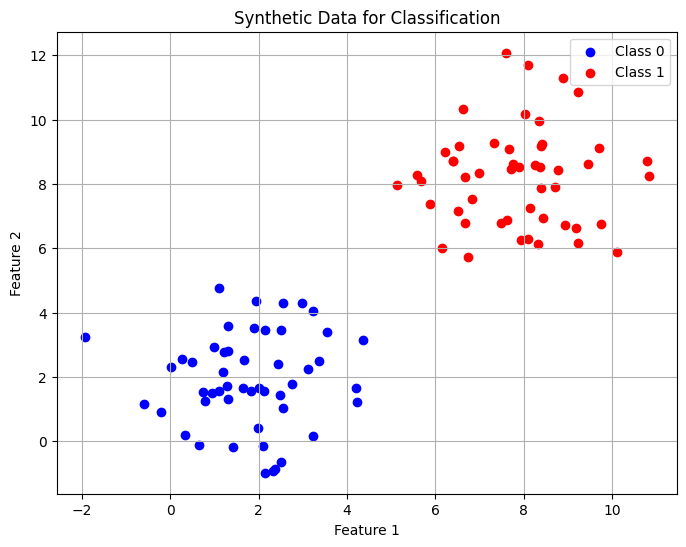

In [3]:
# 2. Visualize the Data
plt.figure(figsize=(8, 6))
plt.scatter(X_0[:, 0], X_0[:, 1], c='blue', label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', label='Class 1')
plt.title('Synthetic Data for Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# 3. Create and Train the Gaussian Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# predict_proba is a method in scikit-learn that returns the probability estimates for each class, rather than just the predicted class labels.
y_pred_proba = model.predict_proba(X_test)

print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Classification Report on test data:\n", classification_report(y_test, y_pred))

Accuracy on test data: 1.0
Classification Report on test data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



https://en.wikipedia.org/wiki/Precision_and_recall

<p><a href="https://commons.wikimedia.org/wiki/File:Precisionrecall.svg#/media/File:Precisionrecall.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" alt="Precisionrecall.svg" height="800" width="440"></a><br>By <a href="https://commons.wikimedia.org/wiki/User:Walber" title="User:Walber">Walber</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=36926283">Link</a></p>

In [5]:
# Example prediction for a new data point
new_point = np.array([[5, 5]])
predicted_class = model.predict(new_point)
predicted_proba = model.predict_proba(new_point)

print(f"\nPredicted class for new point {new_point[0]}: {predicted_class[0]}")
print(f"Probabilities (Class 0, Class 1): {predicted_proba[0]}")


Predicted class for new point [5 5]: 1.0
Probabilities (Class 0, Class 1): [0.43705757 0.56294243]


In [6]:
# Inspect Learned Parameters (Mean and Variance for each feature, per class)
# These are the mu and sigma^2 values from the Gaussian PDF
print("\nLearned Parameters:")
print("Class 0:")
print(f"  Mean (Feature 1, Feature 2): {model.theta_[0]}")
print(f"  Variance (Feature 1, Feature 2): {model.var_[0]}")
print("Class 1:")
print(f"  Mean (Feature 1, Feature 2): {model.theta_[1]}")
print(f"  Variance (Feature 1, Feature 2): {model.var_[1]}")

# You can also get the prior probabilities of each class
print("\nClass Prior Probabilities:")
# This is the CORRECTED way:
print(f"P(Class 0): {model.class_prior_[0]:.4f}")
print(f"P(Class 1): {model.class_prior_[1]:.4f}")


Learned Parameters:
Class 0:
  Mean (Feature 1, Feature 2): [1.94321047 1.9439175 ]
  Variance (Feature 1, Feature 2): [1.75549969 1.98448777]
Class 1:
  Mean (Feature 1, Feature 2): [7.79254769 8.23371526]
  Variance (Feature 1, Feature 2): [1.5822861  2.15940779]

Class Prior Probabilities:
P(Class 0): 0.4714
P(Class 1): 0.5286


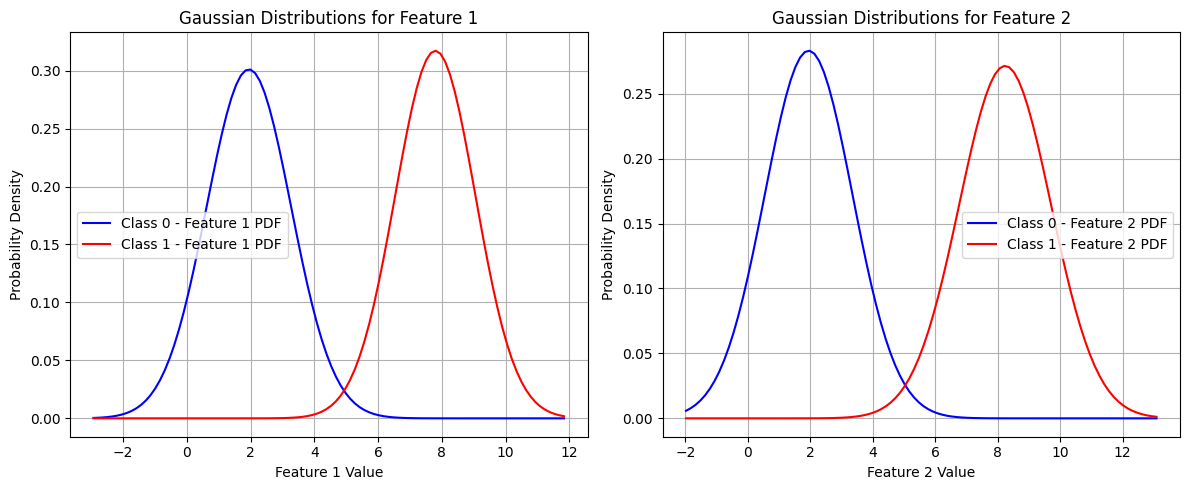

In [7]:
# Visualize the Gaussian distributions for each feature and class (PDF is Probability Density Function)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Feature 1
x_axis = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
axs[0].plot(x_axis, norm.pdf(x_axis, model.theta_[0, 0], np.sqrt(model.var_[0, 0])), label='Class 0 - Feature 1 PDF', color='blue')
axs[0].plot(x_axis, norm.pdf(x_axis, model.theta_[1, 0], np.sqrt(model.var_[1, 0])), label='Class 1 - Feature 1 PDF', color='red')
axs[0].set_title('Gaussian Distributions for Feature 1')
axs[0].set_xlabel('Feature 1 Value')
axs[0].set_ylabel('Probability Density')
axs[0].legend()
axs[0].grid(True)

# Feature 2
x_axis = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 100)
axs[1].plot(x_axis, norm.pdf(x_axis, model.theta_[0, 1], np.sqrt(model.var_[0, 1])), label='Class 0 - Feature 2 PDF', color='blue')
axs[1].plot(x_axis, norm.pdf(x_axis, model.theta_[1, 1], np.sqrt(model.var_[1, 1])), label='Class 1 - Feature 2 PDF', color='red')
axs[1].set_title('Gaussian Distributions for Feature 2')
axs[1].set_xlabel('Feature 2 Value')
axs[1].set_ylabel('Probability Density')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Text Classification with Multinomial Naive Bayes

**Text Classification with Multinomial Naive Bayes:** Using the **20 Newsgroups dataset**. This is a perfect fit for `MultinomialNB` as it deals with word counts (or frequencies), a common scenario in text classification

In [8]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# 1. Load the Dataset
# We'll load a subset of categories to keep it manageable for a quick example.
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

print(f"Training data size: {len(newsgroups_train.data)} documents")
print(f"Test data size: {len(newsgroups_test.data)} documents")
print(f"Categories: {newsgroups_train.target_names}")
# print("\nFirst training document example:")
# print(newsgroups_train.data[0])

Training data size: 2257 documents
Test data size: 1502 documents
Categories: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [10]:
# 2. Feature Extraction (Convert text to numerical features - Word Counts)
# CountVectorizer converts a collection of text documents to a matrix of token counts.
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(newsgroups_train.data)

# IMPORTANT: If we used fit_transform() on test data, the vectorizer would create a different vocabulary
X_test_counts = vectorizer.transform(newsgroups_test.data) # Use the same vocabulary learned from training

y_train = newsgroups_train.target
y_test = newsgroups_test.target

print(f"\nShape of X_train_counts (documents, vocabulary_size): {X_train_counts.shape}")
print(f"Shape of X_test_counts (documents, vocabulary_size): {X_test_counts.shape}")


Shape of X_train_counts (documents, vocabulary_size): (2257, 35788)
Shape of X_test_counts (documents, vocabulary_size): (1502, 35788)


In [11]:
# 3. Create and Train the Multinomial Naive Bayes Model
# alpha=1.0 is the default for Laplace smoothing (additive smoothing)
clf = MultinomialNB(alpha=1.0)
clf.fit(X_train_counts, y_train)

# 4. Make Predictions
y_pred = clf.predict(X_test_counts)
y_pred_proba = clf.predict_proba(X_test_counts)

# 5. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))


Accuracy: 0.9341
Classification Report:

                        precision    recall  f1-score   support

           alt.atheism       0.92      0.90      0.91       319
         comp.graphics       0.95      0.95      0.95       389
               sci.med       0.96      0.91      0.93       396
soc.religion.christian       0.91      0.97      0.94       398

              accuracy                           0.93      1502
             macro avg       0.93      0.93      0.93      1502
          weighted avg       0.93      0.93      0.93      1502



In [12]:
# Example prediction for a single document
new_doc = ["God and science are often debated topics. Computer graphics can visualize complex medical data."]
new_doc_counts = vectorizer.transform(new_doc)
predicted_class_idx = clf.predict(new_doc_counts)[0]
predicted_proba = clf.predict_proba(new_doc_counts)[0]

print(f"\nNew document: '{new_doc[0]}'")
print(f"Predicted category: {newsgroups_train.target_names[predicted_class_idx]}")
print(f"Probabilities (for {newsgroups_train.target_names}): {np.round(predicted_proba, 4)}")


New document: 'God and science are often debated topics. Computer graphics can visualize complex medical data.'
Predicted category: comp.graphics
Probabilities (for ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']): [0.000e+00 9.957e-01 3.500e-03 8.000e-04]


**Explanation:**

1.  **Load Data:** `fetch_20newsgroups` downloads the dataset. We select a few categories to keep the example concise.
2.  **Feature Extraction (`CountVectorizer`):** Text data needs to be converted into numerical features. `CountVectorizer` does this by:
    * Tokenizing the text (breaking it into words).
    * Building a vocabulary of all unique words in the training set.
    * For each document, it counts the occurrences of each word from the vocabulary, creating a sparse matrix where rows are documents and columns are words.
3.  **Train Model:** `MultinomialNB()` is instantiated and trained using `fit()`. It learns the likelihood of each word appearing in each category and the prior probability of each category.
4.  **Prediction:** `predict()` assigns the most probable category, and `predict_proba()` provides the probability distribution over all categories for each test document.
5.  **Evaluation:** We use `accuracy_score` and `classification_report` to assess the model's performance on the test set.

---

## Gaussian Naive Bayes (Numerical Classification)

`GaussianNB` is suitable when features are continuous and can be modeled by a Gaussian (normal) distribution within each class.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import norm # To visualize Gaussian distributions

# 1. Load the Dataset
iris = load_iris()
X = iris.data
y = iris.target

print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4)
Shape of y: (150,)


In [14]:
# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")


Training set size: 105 samples
Test set size: 45 samples


In [15]:
# 3. Create and Train the Gaussian Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# 5. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9778
Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [16]:
# Example prediction for a single new data point
# Let's say a new flower has these measurements:
# sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
new_flower_measurements = np.array([[5.1, 3.5, 1.4, 0.2]]) # Looks like a Setosa
predicted_class_idx = model.predict(new_flower_measurements)[0]
predicted_proba = model.predict_proba(new_flower_measurements)[0]

print(f"\nNew flower measurements: {new_flower_measurements[0]}")
print(f"Predicted species: {iris.target_names[predicted_class_idx]}")
print(f"Probabilities (for {iris.target_names}): {np.round(predicted_proba, 4)}")


New flower measurements: [5.1 3.5 1.4 0.2]
Predicted species: setosa
Probabilities (for ['setosa' 'versicolor' 'virginica']): [1. 0. 0.]


In [17]:
# 6. Inspect Learned Parameters (Mean and Variance for each feature, per class)
print("\nLearned Parameters (Mean and Variance per feature per class):")
for i, target_name in enumerate(iris.target_names):
    print(f"\nClass: {target_name}")
    for j, feature_name in enumerate(iris.feature_names):
        mean = model.theta_[i, j]
        variance = model.var_[i, j]
        print(f"  {feature_name}: Mean = {mean:.4f}, Variance = {variance:.4f}")


Learned Parameters (Mean and Variance per feature per class):

Class: setosa
  sepal length (cm): Mean = 4.9645, Variance = 0.1120
  sepal width (cm): Mean = 3.3774, Variance = 0.1366
  petal length (cm): Mean = 1.4645, Variance = 0.0333
  petal width (cm): Mean = 0.2484, Variance = 0.0115

Class: versicolor
  sepal length (cm): Mean = 5.8622, Variance = 0.2753
  sepal width (cm): Mean = 2.7243, Variance = 0.0872
  petal length (cm): Mean = 4.2108, Variance = 0.2393
  petal width (cm): Mean = 1.3027, Variance = 0.0413

Class: virginica
  sepal length (cm): Mean = 6.5595, Variance = 0.4224
  sepal width (cm): Mean = 2.9865, Variance = 0.0963
  petal length (cm): Mean = 5.5459, Variance = 0.2884
  petal width (cm): Mean = 2.0054, Variance = 0.0859


In [18]:
# You can also get the prior probabilities of each class
print("\nClass Prior Probabilities:")
for i, target_name in enumerate(iris.target_names):
    prior_prob = model.class_prior_[i] # No np.exp() needed here
    print(f"  P({target_name}): {prior_prob:.4f}")


Class Prior Probabilities:
  P(setosa): 0.2952
  P(versicolor): 0.3524
  P(virginica): 0.3524


> Prior probability of a class is simply the initial probability of that class occurring before we consider any specific features or evidence from a data point.

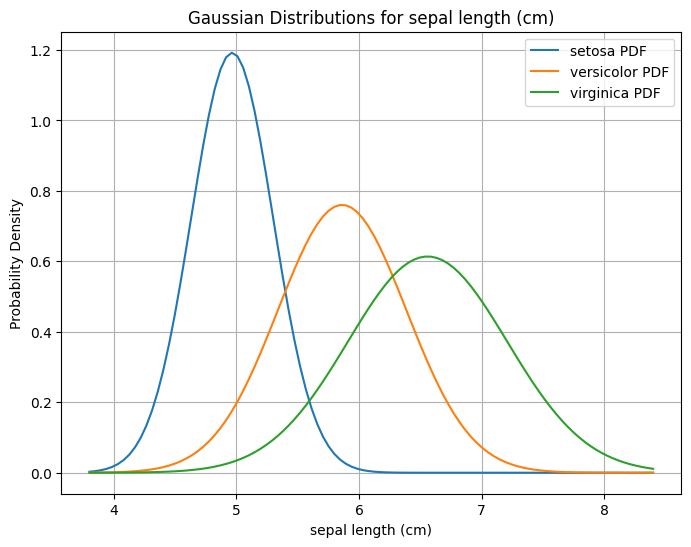

In [19]:
# Visualize the Gaussian distributions for one feature (e.g., 'sepal length (cm)') for each class
plt.figure(figsize=(8, 6))
feature_idx_to_plot = 0 # 'sepal length (cm)'
x_axis = np.linspace(X[:, feature_idx_to_plot].min() - 0.5, X[:, feature_idx_to_plot].max() + 0.5, 100)

for i, target_name in enumerate(iris.target_names):
    mean = model.theta_[i, feature_idx_to_plot]
    std_dev = np.sqrt(model.var_[i, feature_idx_to_plot])
    plt.plot(x_axis, norm.pdf(x_axis, mean, std_dev), label=f'{target_name} PDF')

plt.title(f'Gaussian Distributions for {iris.feature_names[feature_idx_to_plot]}')
plt.xlabel(iris.feature_names[feature_idx_to_plot])
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



**Explanation:**

1.  **Load Data:** `load_iris()` loads the famous Iris flower dataset, which contains measurements of sepal length, sepal width, petal length, and petal width for three species of Iris flowers.
2.  **Train/Test Split:** It's good practice to split your data into training and testing sets to evaluate how well your model generalizes to unseen data.
3.  **Train Model:** `GaussianNB()` is instantiated and trained. It calculates the mean and variance of each feature for each class from the training data.
4.  **Prediction:** Similar to the previous example, `predict()` gives the class, and `predict_proba()` provides the probability distribution.
5.  **Evaluation:** Accuracy and classification report are used to assess performance.
6.  **Learned Parameters & Visualization:** We print the estimated means and variances (`model.theta_` and `model.var_`) for each feature and class, which are the parameters of the Gaussian distributions. The plot visualizes these distributions for a chosen feature, helping to understand how the model differentiates between classes based on feature values.

These examples clearly demonstrate how to leverage `scikit-learn`'s built-in datasets and Naive Bayes implementations for different types of data, making your learning process more efficient and practical.